# Demo Problem

---

## Imports

In [1]:
from thermostate import State, Q_, units

---

## Definitions

In [2]:
substance = 'air'

# State 1
p_1 = Q_(1.0, 'bar')
T_1 = 300.0*units.kelvin
mdot = Q_(5.8, 'kg/s')

# State 2
p_2 = Q_(10.0, 'bar')

# State 3
p_3 = p_2
T_3 = Q_(1400.0, 'kelvin')

# State 4
p_4 = p_1

# Other data
eta_c = Q_(80.0, 'percent')
eta_t = Q_(90.0, 'percent')

---

## Problem Statement

The figure below shows a power system operating at steady state consisting of three components in series: an air compressor, having an isentropic efficiency of $\eta_c =$ 80.0 %, a heat exchanger, and a turbine having an isentropic efficiency of $\eta_t =$ 90.0 %. Air enters the compressor at 1.0 bar, 300.0 K with a mass flow rate of 5.8 kg/s and exits at a pressure of 10.0 bar. Air enters the turbine at 10.0 bar, 1400.0 K and exits at a pressure of 1.0 bar. Air can be modeled as an ideal gas. Stray heat transfer and kinetic and potential energy effects can be neglected. Determine, in kW,

1. the power required by the compressor
2. the power developed by the turbine
3. the net power output of the overall power system

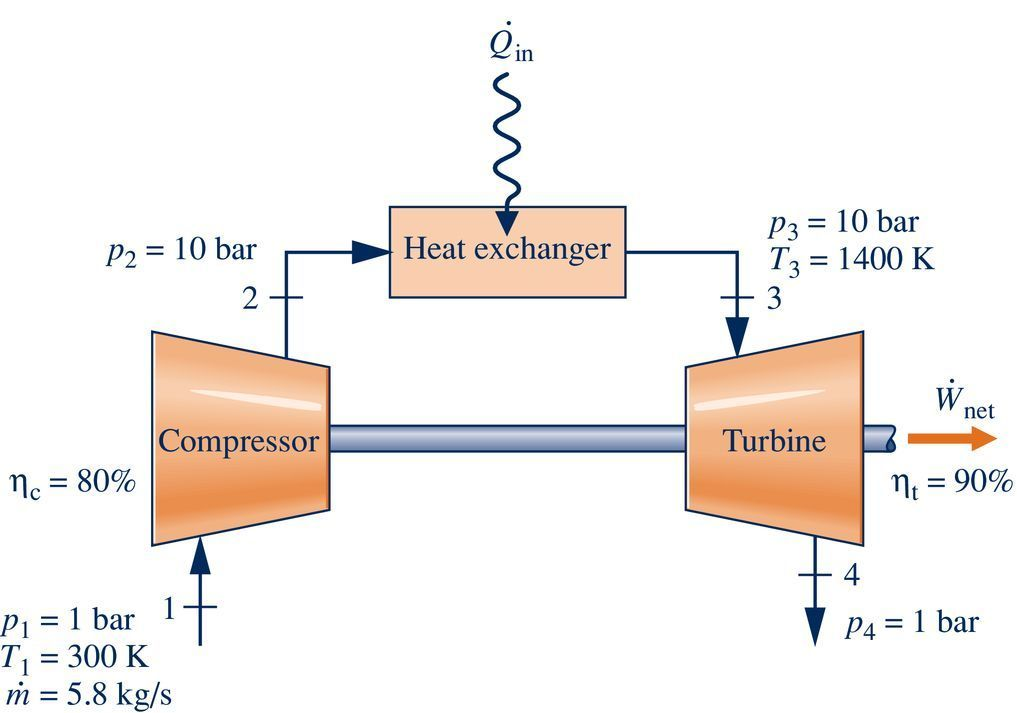

---

## Solution

### 1. The power required by the compressor

To find the power input required by the compressor, we draw a control volume around just the compressor and write the energy rate balance. Simplifying, we find that

$$\dot{W}_c = \dot{m}\left(h_1 - h_2\right)$$

We are given two independent and intensive properties at state 1, so we can fix the state there and determine the enthalpy.

In [4]:
st_1 = State(substance, T=T_1, p=p_1)
h_1 = st_1.h

To find $h_2$, we need to use the isentropic compressor efficiency

$$\eta_c = \frac{h_{2s} - h_1}{h_2 - h_1}$$

The only unknown in this equation is the enthalpy assuming an isentropic compression, so we can use the entropy at state one, plus the pressure at state 2, as our two independent and intensive properties to fix state 2s and find $h_{2s}$.

In [5]:
s_1 =st_1.s
s_2 = s_1
st_2s = State(substance, p=p_2, s=s_2)
h_2s = st_2s.h

Now, we can rearrange and solve for $h_2$

$$h_2 = \frac{h_{2s} - h_1}{\eta_c} + h_1$$

In [6]:
h_2 = h_1 + (h_2s - h_1)/eta_c
Wdot_c = (mdot*(h_1 - h_2)).to('kW')

<div class="alert alert-success">

**Answer:** Finally, we can calculate the work input required for the compressor, remembering to convert to kW: $\dot{W}_c =$ -2031.09 kW

</div>

### 2. The power output from the turbine

Finding the power output required from the turbine will be very similar to finding the power input to the compressor, except we will use the isentropic turbine efficiency instead of the compressor efficiency.

$$\dot{W}_t = \dot{m}\left(h_3 - h_4\right)$$

Finding $h_3$ by using $T_3$ and $p_3$:

In [7]:
st_3 = State(substance, T=T_3, p=p_3)
h_3 = st_3.h

Finding $h_{4s}$ using $p_4$ and $s_4 = s_3$:

In [8]:
s_3 = st_3.s
s_4 = s_3
st_4s = State(substance, p=p_4, s=s_4)
h_4s = st_4s.h

Finding $h_4$ using the isentropic turbine efficiency:

$$h_4 = \eta_t\left(h_{4s} - h_3\right) + h_3$$

In [9]:
h_4 = h_3 + eta_t*(h_4s - h_3)
Wdot_t = (mdot*(h_3 - h_4)).to('kW')

<div class="alert alert-success">

**Answer:** Then, the work output from the turbine is $\dot{W}_t =$ 3693.77 kW

</div>

### 3. The net power output from the overall system

The net power developed is simply the sum of the output from the turbine and the input to the compressor, remembering that the input to the compressor is negative by our sign convention.

In [10]:
Wdot_net = Wdot_t + Wdot_c

<div class="alert alert-success">

**Answer:** The net work output is $\dot{W}_{net} =$ 1662.68 kW

</div>